# EDCS demo
27/09/19
Basic read + plot for EDCS data.

## Basic IO

In [1]:
import sys
import os
import numpy as np

# For module testing, include path to local module code here
modPath = r'/home/femtolab/github/ePSproc/'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


In [3]:
# Load data from modPath\data\filename
dataPath = os.path.join(modPath, 'data')
fileName = 'test13.inp.out'  # Test with standard ePolyScat test job for N2 EDCS

# Scan file(s)
dataSet = ep.readMatEle(os.path.join(dataPath, fileName), recordType = 'EDCS') 

*** ePSproc readMatEle(): scanning files for EDCS segments.

*** Scanning file(s)
['/home/femtolab/github/ePSproc/data/test13.inp.out']

*** Reading ePS output file:  /home/femtolab/github/ePSproc/data/test13.inp.out
Scanning EDCS segments.
Found 4 EDCS segments (sets of scattering results).
Processed 4 sets of EDCS file segments, (0 blank)


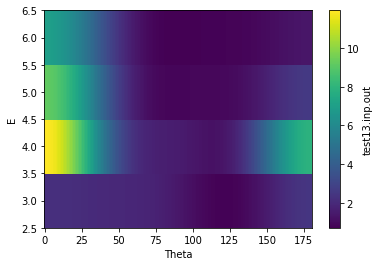

In [4]:
dataSet[0].plot()

## Low-level function tests

In [5]:
# Load data from modPath\data\filename
dataPath = os.path.join(modPath, 'data')
fileName = 'test13.inp.out'  # Test with standard ePolyScat test job for N2 EDCS

# Run low-level file-scanner for EDCS segments
lines, dumpSegs = ep.EDCSFileParse(os.path.join(dataPath, fileName))


Found 4 EDCS segments (sets of scattering results).


In [6]:
# Inspect one file segment
dumpSegs[0]

[[0, 10830, 'EDCS - differential cross section program\n'],
 [0,
  10831,
  '----------------------------------------------------------------------\n'],
 [0, 10832, '\n'],
 [0,
  10833,
  ' Title -                                                                       \n'],
 [0, 10834, ' Maximum l to use from k matrices (lmax) =   10\n'],
 [0,
  10835,
  'Minimum l to compute in the expansion of the DCS (lbigl) =    0\n'],
 [0, 10836, 'Maximum l to use in the expansion of the DCS (lbig) =   20\n'],
 [0, 10837, 'Unit to write DCS in plot format (iuplt) =    0\n'],
 [0, 10838, 'Number of angles at which to compute the DCS (nang) =  181\n'],
 [0, 10839, 'Print flag (iprint) =    0\n'],
 [0, 10840, 'Energy to compute the EDCS at (eV) =      3.00000000\n'],
 [0, 10841, '\n'],
 [0, 10842, '\n'],
 [0,
  10843,
  '  Energy (eV)= 3.0000      Energy (ryd)=0.2204960  xk=0.4695700\n'],
 [0, 10844, '\n'],
 [0, 10845, '\n'],
 [0, 10846, ' AL coefficients\n'],
 [0, 10847, '        -1     0.30000000000

In [7]:
# Parse results - basic manual version
# Now implemented in ep.EDCSSegParse()
# from io import StringIO
# EDCSlist = []
# Elist = []
# for dumpSeg in dumpSegs:
#     # E = dumpSeg[13][2].split()
#     E = np.float(ep.parseLineDigits(dumpSeg[13][2])[0])
#     Elist.append(E)
    
#     # For each line convert to float - bit ugly, but works
#     tmp = []
#     for testLine in dumpSeg[67:]:
#         tmp.append(np.genfromtxt(StringIO(testLine[2])))
    
#     # Stack with E
#     EDCSlist.append(np.asarray(tmp))
    
# np.asarray(Elist)
# # print(np.asarray(EDCSlist))

# With functions

# Single energy
EDCS, attribs = ep.EDCSSegParse(dumpSegs[0])

EDCS[0:10,:]

array([[0.        , 2.23139991],
       [1.        , 2.23116127],
       [2.        , 2.2304487 ],
       [3.        , 2.22927206],
       [4.        , 2.2276469 ],
       [5.        , 2.22559334],
       [6.        , 2.22313448],
       [7.        , 2.22029479],
       [8.        , 2.21709829],
       [9.        , 2.213567  ]])

In [8]:
# Test code - now functionalised in ep.EDCSSegsParseX
import xarray as xr
dataList = []
dataArray = []
ekeList = []
blankSegs = 0

# Loop over DumpIdy segments, extract data & reformat
# If blank, skip parser and append blankSegs.
for dumpSeg in dumpSegs:
    if len(dumpSeg)>4:
        segBlock, attribs = ep.EDCSSegParse(dumpSeg)
        dataArray.append(segBlock[:,1])         # For brevity, just stack XS data here - will save Xarray sorting later.
        dataList.append([segBlock[:,0], segBlock[:,1], attribs])
        ekeList.append(attribs[0][1])

    else:
        blankSegs += 1
        ekeList.append(np.nan)

# Dump lists into Xarray - will work provided same theta over all records.
daOut = xr.DataArray(np.asarray(dataArray), coords={'E':ekeList, 'Theta':segBlock[:,0]}, dims = ['E','Theta'])

daOut

<xarray.DataArray (E: 4, Theta: 181)>
array([[ 2.23139991,  2.23116127,  2.2304487 ,  2.22927206,  2.2276469 ,
         2.22559334,  2.22313448,  2.22029479,  2.21709829,  2.213567  ,
         2.20971953,  2.2055701 ,  2.20112807,  2.19639788,  2.19137963,
         2.18607001,  2.18046374,  2.17455521,  2.16834027,  2.16181805,
         2.15499258,  2.14787412,  2.14048016,  2.13283584,  2.12497398,
         2.11693453,  2.10876353,  2.1005118 ,  2.09223319,  2.08398276,
         2.07581483,  2.06778116,  2.05992926,  2.05230096,  2.04493132,
         2.03784786,  2.03107021,  2.02461003,  2.01847131,  2.01265086,
         2.00713901,  2.00192042,  1.99697496,  1.99227851,  1.98780381,
         1.9835211 ,  1.97939876,  1.97540373,  1.97150188,  1.96765829,
         1.96383735,  1.96000291,  1.95611829,  1.95214635,  1.94804946,
         1.94378954,  1.93932801,  1.93462587,  1.92964366,  1.9243415 ,
         1.91867913,  1.91261592,  1.90611096,  1.89912314,  1.89161125,
         1.88

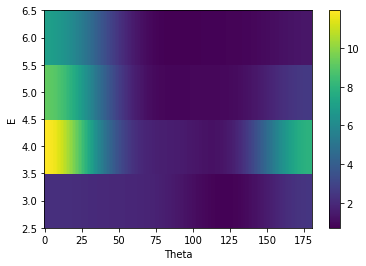

In [9]:
# Plot from Xarray
daOut.plot()